In [1]:
import numpy as np
import pandas as pd

## Load the Datasets

In [2]:
customers = pd.read_csv("C:/Users/vasala harinadha/OneDrive/Desktop/Zeotap/Customers.csv")


In [3]:
transactions = pd.read_csv("C:/Users/vasala harinadha/OneDrive/Desktop/Zeotap/Transactions.csv")


In [4]:
products = pd.read_csv("C:/Users/vasala harinadha/OneDrive/Desktop/Zeotap/Products.csv")


## Explore the Datasets


In [5]:
print(customers.info())
print("       ")
print(products.info())
print("       ")
print(transactions.info())
print("           ")
print(customers.head())
print("      ")
print(products.head())
print("         ")
print(transactions.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
       
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------         

## Data Cleaning

In [6]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

# Drop duplicates if found
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()

# Check for null values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


0
0
0
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Merge Datasets for Analysis

In [7]:
# Merge transactions with customers
merged = transactions.merge(customers, on='CustomerID', how='left')

# Merge the result with products
merged = merged.merge(products, on='ProductID', how='left')

# Preview the merged dataset
print(merged.head())


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Electronic

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

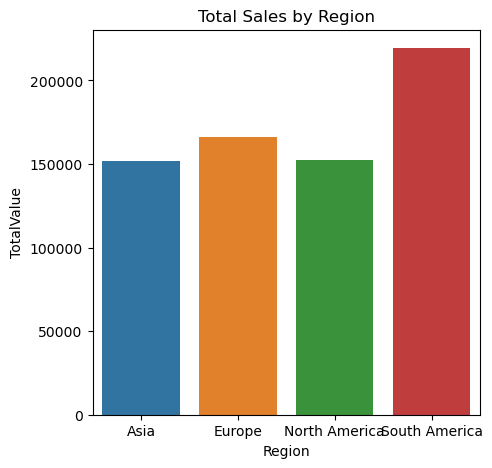

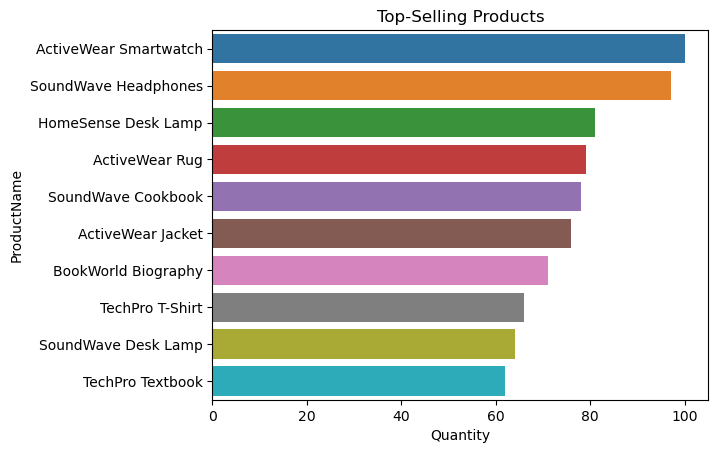

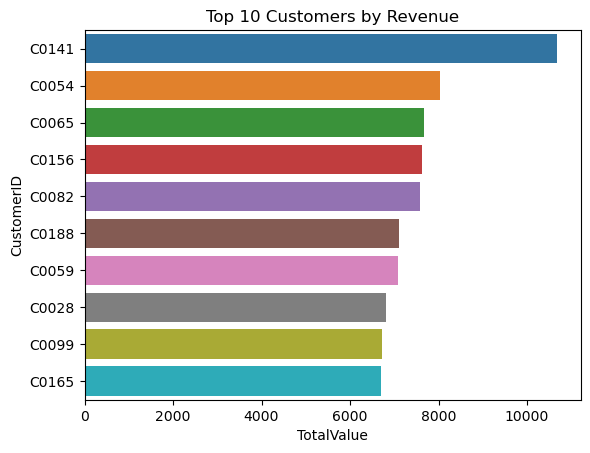

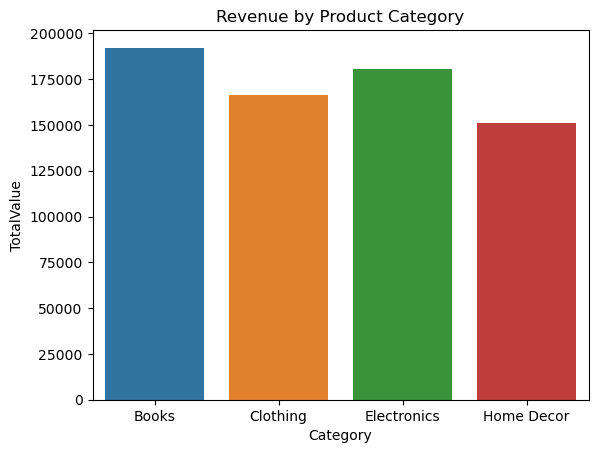

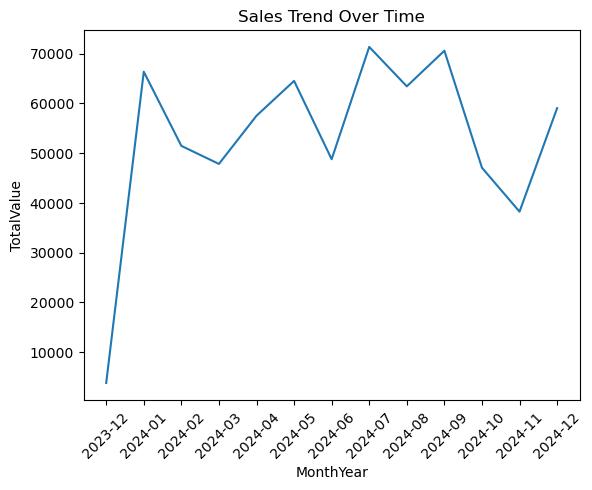

In [17]:
# Region-wise sales
plt.figure(figsize=(5,5))  # Increase height here
region_sales = merged.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(data=region_sales, x='Region', y='TotalValue')
plt.title('Total Sales by Region')
plt.show()

# Top-selling products
top_products = merged.groupby('ProductName')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)
sns.barplot(data=top_products, x='Quantity', y='ProductName')
plt.title('Top-Selling Products')
plt.show()

# Most valuable customers
top_customers = merged.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)
sns.barplot(data=top_customers, x='TotalValue', y='CustomerID')
plt.title('Top 10 Customers by Revenue')
plt.show()

# Category performance
category_sales = merged.groupby('Category')['TotalValue'].sum().reset_index()
sns.barplot(data=category_sales, x='Category', y='TotalValue')
plt.title('Revenue by Product Category')
plt.show()

# Time-based trends
merged['MonthYear'] = merged['TransactionDate'].dt.to_period('M')
sales_trend = merged.groupby('MonthYear')['TotalValue'].sum().reset_index()
sales_trend['MonthYear'] = sales_trend['MonthYear'].astype(str)
sns.lineplot(data=sales_trend, x='MonthYear', y='TotalValue')
plt.xticks(rotation=45)
plt.title('Sales Trend Over Time')
plt.show()
